# 逻辑回归推导与实现

## 1. sigmod 推导

$$ \begin{align} 
sigmod(x) &= \frac{1}{1+e^{-x}} \\
sigmod'(x) &= \frac{ \partial sigmod(x) } { \partial x} \\
&= \frac{\partial \frac{1}{1+e^{-x}}} {\partial x} \\
&= (-1) * (1+e^{-x})^{-2} * \frac {\partial (1+e^{-x})} {\partial x} \\
&= (-1) * (1+e^{-x})^{-2} * e^{-x} * (-1) \\
&= (1+e^{-x})^{-2} * e^{-x} \\
&= \frac{1}{1+e^{-x}} * \frac{e^{-x}}{1+e^{-x}} \\
&= sigmod(x) * (1-sigmod(x)) \\
\end{align} $$

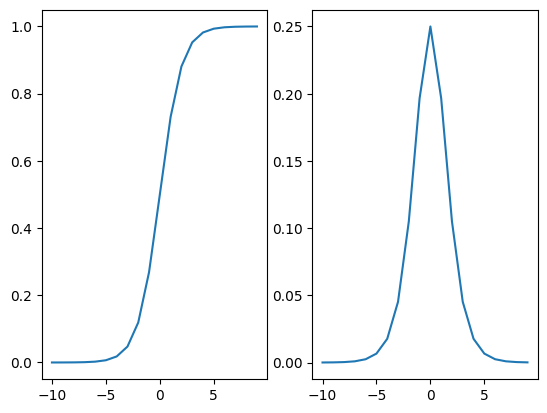

In [9]:
import matplotlib.pyplot as plt
import random
import math

def sigmod(x):
    return 1/(1+math.exp(-x))

x = list(range(-10, 10))

y = [sigmod(_) for _ in x]
z = [sigmod(_)*(1-sigmod(_)) for _ in x]

p1 = plt.subplot(121)
p1.plot(x, y)

p2 = plt.subplot(122)
p2.plot(x, z)

## 2 逻辑回归

#### a) forward

$$ h(x) = sigmod(w^Tx) $$

x, w 为列向量

 #### b) loss function

$$ loss = -[ylog(h(x))+(1-y)log(1-h(x))] $$

以单个样本为例的交叉熵公式，mini-batch版加入求和即可；y 为 0， 1 标签

#### c) backward

$$ \begin{align}
\frac{\partial h(x)}{\partial w} &= sigmod(w^Tx) * (1-sigmod(w^Tx)) * x \\
&= h(x) * (1-h(x)) * x
\end{align}$$

$$ \begin{align}
\frac {\partial loss} {\partial w} &= -[y* \frac{1}{h(x)}* \frac{\partial h(x)}{ \partial w} + (1-y) * \frac{1}{1-h(x)}*(-1)* \frac{\partial h(x)}{ \partial w}] \\
&= -[y* \frac{1}{h(x)} + (y-1) * \frac{1}{1-h(x)}] * \frac{\partial h(x)}{ \partial w} \\
\end{align} $$

$$ \begin{align}
\frac {\partial loss} {\partial w} &= -[y* \frac{1}{h(x)} + (y-1) * \frac{1}{1-h(x)}] * h(x) * (1-h(x)) * x \\
&= -[y*(1-h(x))  + (y-1) * h(x)]  * x \\
&= -[y - h(x)] * x \\
\end{align} $$

#### d) 推广至batch

$$ \begin{align}
\frac {\partial loss} {\partial w} &= - \frac{1}{N} \sum_{i=1}^{N} {[y_i - h(x_i)] * x_i} \\
\end{align} $$

## 3 numpy 实现

In [269]:
class LR:
    def __init__(self, input_dim):
        self.W = np.zeros((1, input_dim))
        self.b = 0
        self.learning_rate = 0
    
    def sigmoid(self, x):
        """
        sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """
        sigmoid derivative funciton
        """
        return sigmoid(x) * (1 - sigmoid(x))
    
    def loss_function(self, y, p):
        """
        calcute the loss between true labels and preds using cross-entroy
        y: true labels
        p: preds
        """
        return -1 / len(y) * (np.dot(y.T, np.log(p)) + np.dot((1-y).T, np.log(1-p)))
    
    def forward(self, X):
        """
        X: m*n m为样本数量，n为特征维度
        """
        # self.W 1*n，n为特征维度
        z = np.dot(X, self.W.T) + self.b # m*1
        a = self.sigmoid(z)

        return a
    
    def backward(self, X, y, p):
        """
        X: m*n
        y: m*1
        p: m*1
        """
        loss = self.loss_function(y, p)
        dw = -1/len(y)*np.dot((y-p).T, X)
        db = -1/len(y)*np.sum(y-p)
        
        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
        return loss
        
    def fit(self, train_data, train_labels, epochs=1000, batch_size=64, learning_rate=1):
        """
        fit the model using minibatch gradient descent
        """
        self.learning_rate = learning_rate
        m, n = train_data.shape
        
        assert m == train_labels.shape[0]
        
        batch_num = int(m/batch_size)+1
        for epoch in range(epochs):
            for bn in range(batch_num):
                start = bn * batch_size
                end = start + batch_size
                
                if start >= m:
                    break
                if end >= m:
                    end = m
                X = train_data[start:end]
                y = train_labels[start:end]
                
                p = self.forward(X)
                
                loss = self.backward(X, y, p)
                
                print("epoch: {}, batch_num: {} loss: {}".format(epoch, bn, loss))
    

In [270]:
import numpy as np

In [271]:
train_data = np.array([[1, 2], [2, 1]])
train_labels = np.array([1, 0])
train_labels = train_labels.reshape((train_data.shape[0], 1))
lr = LR(2)
lr.fit(train_data, train_labels)

epoch: 0, batch_num: 0 loss: [[0.69314718]]
epoch: 1, batch_num: 0 loss: [[0.57593942]]
epoch: 2, batch_num: 0 loss: [[0.48592791]]
epoch: 3, batch_num: 0 loss: [[0.41617735]]
epoch: 4, batch_num: 0 loss: [[0.36142023]]
epoch: 5, batch_num: 0 loss: [[0.3178012]]
epoch: 6, batch_num: 0 loss: [[0.28253777]]
epoch: 7, batch_num: 0 loss: [[0.25362299]]
epoch: 8, batch_num: 0 loss: [[0.2295994]]
epoch: 9, batch_num: 0 loss: [[0.20939709]]
epoch: 10, batch_num: 0 loss: [[0.19222074]]
epoch: 11, batch_num: 0 loss: [[0.17747124]]
epoch: 12, batch_num: 0 loss: [[0.16469136]]
epoch: 13, batch_num: 0 loss: [[0.15352765]]
epoch: 14, batch_num: 0 loss: [[0.1437036]]
epoch: 15, batch_num: 0 loss: [[0.1350004]]
epoch: 16, batch_num: 0 loss: [[0.12724303]]
epoch: 17, batch_num: 0 loss: [[0.12029017]]
epoch: 18, batch_num: 0 loss: [[0.11402656]]
epoch: 19, batch_num: 0 loss: [[0.10835746]]
epoch: 20, batch_num: 0 loss: [[0.10320434]]
epoch: 21, batch_num: 0 loss: [[0.09850163]]
epoch: 22, batch_num: 0 